In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
df=pd.read_csv('diabetes.csv',index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [66]:
df.isnull()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
10,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False


<AxesSubplot:ylabel='Pregnancies'>

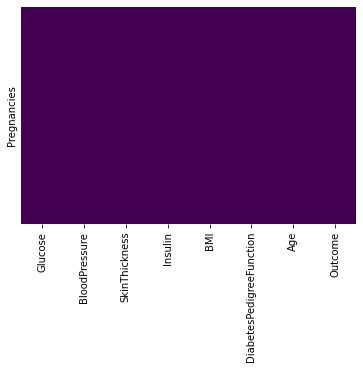

In [67]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis=1))

StandardScaler()

In [70]:
scaled_features=scaler.transform(df.drop('Outcome',axis=1))

In [71]:
scaled_features

array([[ 0.84832379,  0.14964075,  0.90726993, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-1.12339636, -0.16054575,  0.53090156, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.94372388, -0.26394125, -1.28821221, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.00330087,  0.14964075,  0.15453319, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [ 0.1597866 , -0.47073225, -1.28821221, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.8730192 ,  0.04624525,  0.65635768, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df['Outcome'],test_size=0.3,random_state=101)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with "k=1"

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn =  KNeighborsClassifier(n_neighbors=1)

In [91]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Predictions

In [94]:
predictions=knn.predict(x_test)

In [95]:
predictions

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [102]:
y_test

Pregnancies
1    1
3    1
7    0
0    1
4    0
    ..
8    1
2    1
2    0
0    0
7    1
Name: Outcome, Length: 231, dtype: int64

### Evaluations

Let's evaluate our KNN model!

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
print(confusion_matrix(y_test,predictions))

[[116  34]
 [ 35  46]]


In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       150
           1       0.57      0.57      0.57        81

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



## Choosing a K value

Let's go ahead and use the elbow method to pick a good K Value:

In [108]:
error_rate = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
error_rate

Text(0, 0.5, 'Error Rate')

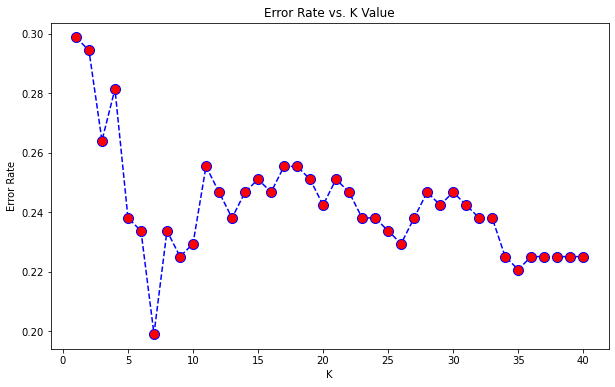

In [113]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after around K>34 the error rate just becomes constant at 0.22. Let's retrain the model with that and check the classification report!

### Comparison (b/w K values)

In [122]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[116  34]
 [ 35  46]]


              precision    recall  f1-score   support

           0       0.77      0.77      0.77       150
           1       0.57      0.57      0.57        81

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



In [123]:
# NOW WITH K=34
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=34')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=34


[[136  14]
 [ 38  43]]


              precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.75      0.53      0.62        81

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231

